In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

Texas_quality = pd.read_csv("Texas_Qualitylife.csv")

In [126]:
quality_Texas = Texas_quality[Texas_quality['LSTATE'].str.contains('TX', case=False, na=False)]
quality_Texas['ULOCALE'].unique()

quality_Texas

,countyhelper,LSTATE,NMCNTY,FIPS,LZIP,ULOCALE,Overall Rank,2022 Population,2016 Crime Rate,Unemployment,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
1,TXMcmullen County,TX,McMullen County,48311,78072,43-Rural: Remote,NaN,576,47/1000,1.81%,...,105.46%,111.95%,72.03%,90.73%,104.21%,120.05%,127.11%,3,2,87
2,TXTerrell County,TX,Terrell County,48443,79848,43-Rural: Remote,NaN,693,20/1000,3.54%,...,127.10%,135.84%,87.96%,110.73%,125.11%,145.91%,153.79%,12,3,47
7,TXCochran County,TX,Cochran County,48079,79379,43-Rural: Remote,NaN,"2,526",33/1000,5.08%,...,112.29%,121.64%,79.03%,99.96%,114.19%,131.65%,140.54%,41,8,135
8,TXArmstrong County,TX,Armstrong County,48011,79019,42-Rural: Distant,NaN,"1,850",7/1000,2.85%,...,103.99%,110.78%,63.85%,85.75%,98.54%,116.02%,122.96%,16,9,28
9,TXDelta County,TX,Delta County,48119,75469,43-Rural: Remote,NaN,"5,406",6/1000,4.18%,...,108.26%,115.55%,74.63%,94.65%,107.74%,125.03%,132.93%,349,10,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,TXTarrant County,TX,Tarrant County,48439,76118,21-Suburb: Large,NaN,"2,154,595",30/1000,3.74%,...,103.15%,108.74%,62.17%,83.12%,95.65%,113.37%,120.02%,3036,3120,3125
3122,TXBexar County,TX,Bexar County,48029,78109,21-Suburb: Large,NaN,"2,059,530",50/1000,3.84%,...,109.29%,115.61%,66.44%,90.25%,104.20%,122.00%,128.41%,3035,3123,3122
3123,TXHidalgo County,TX,Hidalgo County,48215,78539,12-City: Mid-size,NaN,"888,367",30/1000,6.93%,...,138.74%,148.26%,90.28%,119.83%,138.05%,160.55%,169.30%,3020,3124,3104
3124,TXDallas County,TX,Dallas County,48113,75146,41-Rural: Fringe,NaN,"2,600,840",36/1000,3.85%,...,121.22%,128.02%,73.80%,98.57%,113.73%,133.57%,141.59%,3041,3125,3129


In [127]:
features = [
    'Cost of Living',
    'Unemployment',
    '2022 Median Income',
    'WaterQualityVPV',
    'Diversity Rank (Race)',
    'Diversity Rank (Gender)',
    'ULOCALE'
]

quality_Texas['Cost of Living'] = quality_Texas['Cost of Living'].replace({r'[,\$]': ''}, regex=True).astype(float)
quality_Texas['2022 Median Income'] = quality_Texas['2022 Median Income'].replace({r'[,\$]': ''}, regex=True).astype(float)
quality_Texas['Unemployment'] = quality_Texas['Unemployment'].replace({r'[,\%]': ''}, regex=True).astype(float)
quality_Texas['ULOCALE'] = quality_Texas['ULOCALE'].str.replace(r'[\d\-]+', '', regex=True)
quality_Texas['ULOCALE'] = quality_Texas['ULOCALE'].str.strip()



X = quality_Texas[features]


X


/var/folders/m8/1fpvkz014031zsf69k406s0w0000gn/T/ipykernel_97658/299530786.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_Texas['Cost of Living'] = quality_Texas['Cost of Living'].replace({r'[,\$]': ''}, regex=True).astype(float)
/var/folders/m8/1fpvkz014031zsf69k406s0w0000gn/T/ipykernel_97658/299530786.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_Texas['2022 Median Income'] = quality_Texas['2022 Median Income'].replace({r'[,\$]': ''}, regex=True).astype(float)
/var/folders/m8/

,Cost of Living,Unemployment,2022 Median Income,WaterQualityVPV,Diversity Rank (Race),Diversity Rank (Gender),ULOCALE
1,63913.28,1.81,67513.81,2,2,87,Rural: Remote
2,64361.02,3.54,55946.62,3,3,47,Rural: Remote
7,61721.15,5.08,59858.82,4,8,135,Rural: Remote
8,73725.97,2.85,81611.11,1,9,28,Rural: Distant
9,62084.03,4.18,63549.24,-1,10,454,Rural: Remote
...,...,...,...,...,...,...,...
3119,72592.42,3.74,82001.30,5,3120,3125,Suburb: Large
3122,66248.04,3.84,69862.16,1,3123,3122,Suburb: Large
3123,56645.44,6.93,45446.29,13,3124,3104,City: Midsize
3124,72227.78,3.85,68960.61,1,3125,3129,Rural: Fringe


In [128]:
X['ULOCALE'].unique()

array(['Rural: Remote', 'Rural: Distant', 'Town: Remote', 'Town: Distant',
       'Rural: Fringe', 'Town: Fringe', 'Suburb: Large', 'City: Small',
       'Suburb: Midsize', 'City: Midsize', 'City: Large'], dtype=object)

In [129]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer


location = ['Rural: Remote', 'Rural: Distant', 'Rural: Fringe', 'Town: Remote', 'Town: Distant', 'Town: Fringe', 'Suburb: Midsize', 'Suburb: Large', 'City: Small', 'City: Midsize', 'City: Large']
ord_features = ['ULOCALE']
ordEnc = OrdinalEncoder(categories = [location])

ordinal_encoder = OrdinalEncoder()
X['ULOCALE'] = ordinal_encoder.fit_transform(X[['ULOCALE']])

coltrans = ColumnTransformer(
    transformers=[
        ("ord", ordinal_encoder, ord_features),   
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(X)


new_feature_names = coltrans.get_feature_names_out()

Texas_encoded = pd.DataFrame(X_trans, columns = new_feature_names)
Texas_encoded


/var/folders/m8/1fpvkz014031zsf69k406s0w0000gn/T/ipykernel_97658/60326765.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ULOCALE'] = ordinal_encoder.fit_transform(X[['ULOCALE']])


,ULOCALE,Cost of Living,Unemployment,2022 Median Income,WaterQualityVPV,Diversity Rank (Race),Diversity Rank (Gender)
0,5.0,63913.28,1.81,67513.81,2.0,2.0,87.0
1,5.0,64361.02,3.54,55946.62,3.0,3.0,47.0
2,5.0,61721.15,5.08,59858.82,4.0,8.0,135.0
3,3.0,73725.97,2.85,81611.11,1.0,9.0,28.0
4,5.0,62084.03,4.18,63549.24,-1.0,10.0,454.0
...,...,...,...,...,...,...,...
248,6.0,72592.42,3.74,82001.30,5.0,3120.0,3125.0
249,6.0,66248.04,3.84,69862.16,1.0,3123.0,3122.0
250,1.0,56645.44,6.93,45446.29,13.0,3124.0,3104.0
251,4.0,72227.78,3.85,68960.61,1.0,3125.0,3129.0


In [172]:
new_features = [
    '2022 Median Income', 
    'Cost of Living', 
    'Unemployment', 
    'ULOCALE',
    'WaterQualityVPV',
    'Diversity Rank (Gender)',
    'Diversity Rank (Race)',
]
X_living = Texas_encoded[['2022 Median Income', 'Cost of Living', 'Unemployment', 'ULOCALE', 'WaterQualityVPV', 'Diversity Rank (Gender)', 'Diversity Rank (Race)']].copy()

# Invert the features where lower is better
X_living['Cost of Living'] = -X_living['Cost of Living']
X_living['Unemployment Rate'] = -X_living['Unemployment']
X_living['Diversity Rank (Gender)'] = -X_living['Diversity Rank (Gender)']
X_living['Diversity Rank (Race)'] = -X_living['Diversity Rank (Race)']


X = X_living[new_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)




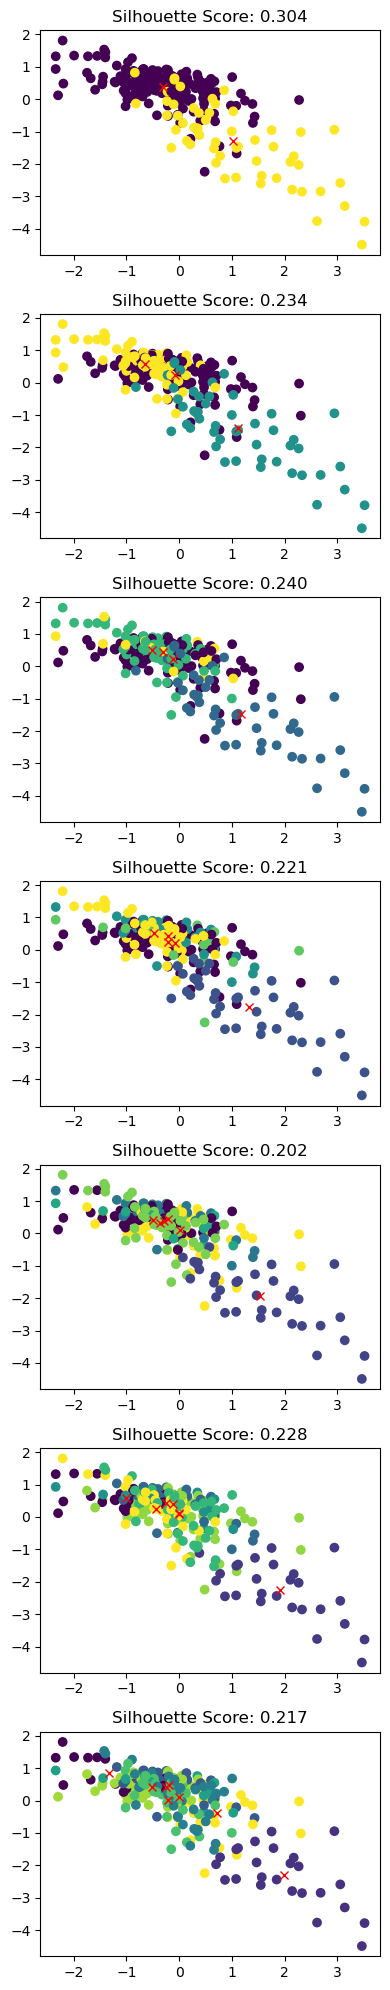

In [173]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]  

fig, ax = plt.subplots(len(n_clusters), 1, figsize=(4, 20))

for k, nc in enumerate(n_clusters):
    km = KMeans(n_clusters=nc, random_state=42)
    km.fit(X_scaled)  
    labels = km.labels_
    centroids = km.cluster_centers_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    
    ax[k].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
    ax[k].plot(centroids[:, 0], centroids[:, 1], 'rx')
    ax[k].set_title(f'Silhouette Score: {score:.3f}')
    
plt.tight_layout()
plt.show()

In [164]:
labels

array([7, 6, 6, 7, 6, 7, 6, 6, 6, 0, 6, 6, 2, 2, 6, 7, 6, 6, 2, 6, 4, 7,
       7, 6, 6, 7, 0, 7, 7, 7, 6, 6, 7, 6, 6, 6, 2, 6, 6, 6, 6, 6, 7, 2,
       2, 0, 2, 6, 2, 7, 6, 6, 0, 7, 4, 7, 4, 2, 6, 2, 6, 2, 6, 6, 7, 2,
       2, 7, 2, 6, 7, 6, 4, 2, 6, 7, 6, 6, 7, 4, 6, 6, 2, 4, 6, 6, 2, 0,
       0, 2, 2, 2, 6, 6, 6, 6, 7, 4, 6, 6, 2, 7, 0, 7, 7, 7, 4, 6, 7, 3,
       6, 6, 6, 2, 2, 2, 7, 6, 6, 6, 4, 0, 6, 3, 4, 6, 2, 4, 4, 2, 2, 6,
       2, 3, 6, 5, 2, 2, 2, 2, 3, 3, 3, 0, 0, 5, 5, 3, 6, 3, 2, 2, 6, 2,
       3, 3, 6, 0, 6, 5, 7, 5, 4, 1, 3, 5, 3, 6, 5, 3, 3, 1, 6, 3, 1, 0,
       3, 1, 5, 3, 3, 3, 3, 4, 5, 5, 5, 5, 1, 3, 5, 3, 5, 5, 3, 5, 3, 5,
       5, 0, 3, 4, 5, 5, 1, 1, 5, 5, 3, 3, 5, 1, 5, 3, 5, 3, 1, 3, 3, 1,
       0, 5, 1, 1, 5, 0, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 4, 5, 1, 3, 1, 1,
       3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3], dtype=int32)

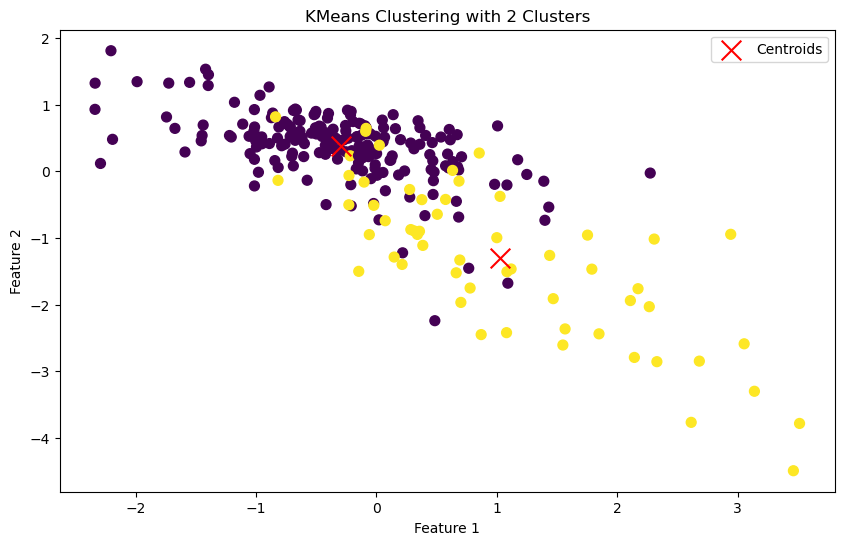

In [178]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('KMeans Clustering with 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


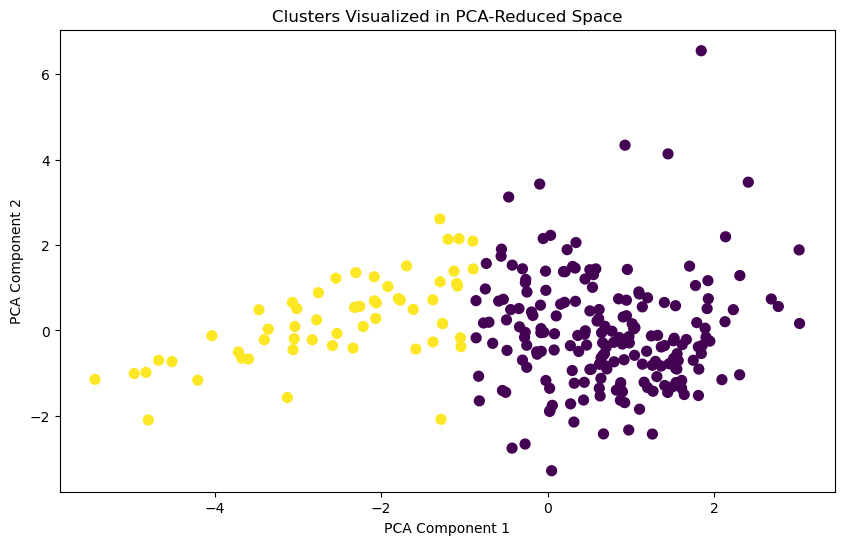

,NMCNTY,Cluster
1,McMullen County,0
1120,Yoakum County,0
1127,Gaines County,0
1141,Palo Pinto County,0
1180,Jackson County,0
...,...,...
2631,Guadalupe County,1
2633,Victoria County,1
2652,Hill County,1
2683,San Patricio County,1


In [179]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Visualized in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

county_clusters = pd.DataFrame({
	'NMCNTY': quality_Texas['NMCNTY'],
	'Cluster': labels
})

county_clusters_sorted = county_clusters.sort_values(by='Cluster')

county_clusters_sorted

In [180]:
import plotly.express as px
import pandas as pd

# Assume you have:
# - 'X_pca' = your 2D PCA-transformed features (NumPy array)
# - 'df' = your original DataFrame, including a 'County Name' column
# - 'km.labels_' = cluster labels from KMeans

# 1. Create a new DataFrame with the PCA and cluster info
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'County': county_clusters['NMCNTY'],    # or whatever the exact column name is
    'Cluster': kmeans.labels_
})

# 2. Plot
fig = px.scatter(
    pca_df,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    hover_data=['County'],   # <-- this is the magic!
    title='Texas Counties: KMeans Clustering on PCA-reduced Data',
    color_continuous_scale='Viridis'  # you can also use discrete colors if clusters are integers
)

fig.show()

In [171]:
county_clusters

,NMCNTY,Cluster
1,McMullen County,0
2,Terrell County,0
7,Cochran County,0
8,Armstrong County,0
9,Delta County,0
...,...,...
3119,Tarrant County,1
3122,Bexar County,1
3123,Hidalgo County,0
3124,Dallas County,1


In [177]:
starr = quality_Texas[quality_Texas['NMCNTY'] == 'Starr County']

starr

,countyhelper,LSTATE,NMCNTY,FIPS,LZIP,ULOCALE,Overall Rank,2022 Population,2016 Crime Rate,Unemployment,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
2762,TXStarr County,TX,Starr County,48427,78584,Town: Distant,NaN,"65,728",14/1000,12.3,...,177.46%,190.13%,123.36%,156.76%,178.41%,207.10%,218.92%,2337,2763,2318


In [170]:
quality_Texas

,countyhelper,LSTATE,NMCNTY,FIPS,LZIP,ULOCALE,Overall Rank,2022 Population,2016 Crime Rate,Unemployment,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
1,TXMcmullen County,TX,McMullen County,48311,78072,Rural: Remote,NaN,576,47/1000,1.81,...,105.46%,111.95%,72.03%,90.73%,104.21%,120.05%,127.11%,3,2,87
2,TXTerrell County,TX,Terrell County,48443,79848,Rural: Remote,NaN,693,20/1000,3.54,...,127.10%,135.84%,87.96%,110.73%,125.11%,145.91%,153.79%,12,3,47
7,TXCochran County,TX,Cochran County,48079,79379,Rural: Remote,NaN,"2,526",33/1000,5.08,...,112.29%,121.64%,79.03%,99.96%,114.19%,131.65%,140.54%,41,8,135
8,TXArmstrong County,TX,Armstrong County,48011,79019,Rural: Distant,NaN,"1,850",7/1000,2.85,...,103.99%,110.78%,63.85%,85.75%,98.54%,116.02%,122.96%,16,9,28
9,TXDelta County,TX,Delta County,48119,75469,Rural: Remote,NaN,"5,406",6/1000,4.18,...,108.26%,115.55%,74.63%,94.65%,107.74%,125.03%,132.93%,349,10,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,TXTarrant County,TX,Tarrant County,48439,76118,Suburb: Large,NaN,"2,154,595",30/1000,3.74,...,103.15%,108.74%,62.17%,83.12%,95.65%,113.37%,120.02%,3036,3120,3125
3122,TXBexar County,TX,Bexar County,48029,78109,Suburb: Large,NaN,"2,059,530",50/1000,3.84,...,109.29%,115.61%,66.44%,90.25%,104.20%,122.00%,128.41%,3035,3123,3122
3123,TXHidalgo County,TX,Hidalgo County,48215,78539,City: Midsize,NaN,"888,367",30/1000,6.93,...,138.74%,148.26%,90.28%,119.83%,138.05%,160.55%,169.30%,3020,3124,3104
3124,TXDallas County,TX,Dallas County,48113,75146,Rural: Fringe,NaN,"2,600,840",36/1000,3.85,...,121.22%,128.02%,73.80%,98.57%,113.73%,133.57%,141.59%,3041,3125,3129
